# Using Gausian Model Mixture to Identify Accents

In [3]:
from typing import List
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
def gmm_predict(gmm_models: List[GaussianMixture], testing_data: np.ndarray, labels: np.ndarray):
    assert testing_data.ndim == 2
    N, _ = testing_data.shape
    correct = 0
    for i in range(N):
        data = testing_data[i, :].reshape((1, -1))
        label = labels[i]
        predicted_label = np.argmax([gmm_model.score(data) for gmm_model in gmm_models])
        if predicted_label == label: correct += 1
    return correct / N

## First Feature Engineering Parameters: Sample Rate
In this section, we are going to explore how different sample rate interfere the accuracy for GMM training model

In [5]:
bangla_8000 = np.load('../data_output/8000_fix-length_flatten/bangla/speaker_01/data.npy')
bangla_8000_label = np.zeros((bangla_8000.shape[0]), dtype=np.int8) + 0
malayalam_8000 = np.load('../data_output/8000_fix-length_flatten/malayalam/speaker_01/data.npy')
malayalam_8000_label = np.zeros((malayalam_8000.shape[0]), dtype=np.int8) + 1
odiya_8000 = np.load('../data_output/8000_fix-length_flatten/odiya/speaker_01/data.npy')
odiya_8000_label = np.zeros((odiya_8000.shape[0]), dtype=np.int8) + 2
telugu_8000 = np.load('../data_output/8000_fix-length_flatten/telugu/speaker_01/data.npy')
telugu_8000_label = np.zeros((telugu_8000.shape[0]), dtype=np.int8) + 3

bangla_16000 = np.load('../data_output/16000_fix-length_flatten/bangla/speaker_01/data.npy')
bangla_16000_label = np.zeros((bangla_16000.shape[0]), dtype=np.int8) + 0
malayalam_16000 = np.load('../data_output/16000_fix-length_flatten/malayalam/speaker_01/data.npy')
malayalam_16000_label = np.zeros((malayalam_16000.shape[0]), dtype=np.int8) + 1
odiya_16000 = np.load('../data_output/16000_fix-length_flatten/odiya/speaker_01/data.npy')
odiya_16000_label = np.zeros((odiya_16000.shape[0]), dtype=np.int8) + 2
telugu_16000 = np.load('../data_output/16000_fix-length_flatten/telugu/speaker_01/data.npy')
telugu_16000_label = np.zeros((telugu_16000.shape[0]), dtype=np.int8) + 3

In [9]:
accuracies_8000 = []
accuracies_16000 = []

for _ in tqdm(range(100)):
    # Reading all 8000 Hz sample rate data
    bangla_8000_train, bangla_8000_test, bangla_8000_label_train, bangla_8000_label_test = train_test_split(bangla_8000, bangla_8000_label, test_size=0.2, shuffle=True)
    malayalam_8000_train, malayalam_8000_test, malayalam_8000_label_train, malayalam_8000_label_test = train_test_split(malayalam_8000, malayalam_8000_label, test_size=0.2, shuffle=True)
    odiya_8000_train, odiya_8000_test, odiya_8000_label_train, odiya_8000_label_test = train_test_split(odiya_8000, odiya_8000_label, test_size=0.2, shuffle=True)
    telugu_8000_train, telugu_8000_test, telugu_8000_label_train, telugu_8000_label_test = train_test_split(telugu_8000, telugu_8000_label, test_size=0.2, shuffle=True)

    testing_8000 = np.vstack((bangla_8000_test, malayalam_8000_test, odiya_8000_test, telugu_8000_test))
    testing_label_8000 = np.concatenate((bangla_8000_label_test, malayalam_8000_label_test, odiya_8000_label_test, telugu_8000_label_test))

    # Reading all 16000 Hz sample rate data
    bangla_16000_train, bangla_16000_test, bangla_16000_label_train, bangla_16000_label_test = train_test_split(bangla_16000, bangla_16000_label, test_size=0.2, shuffle=True)
    malayalam_16000_train, malayalam_16000_test, malayalam_16000_label_train, malayalam_16000_label_test = train_test_split(malayalam_16000, malayalam_16000_label, test_size=0.2, shuffle=True)
    odiya_16000_train, odiya_16000_test, odiya_16000_label_train, odiya_16000_label_test = train_test_split(odiya_16000, odiya_16000_label, test_size=0.2, shuffle=True)
    telugu_16000_train, telugu_16000_test, telugu_16000_label_train, telugu_16000_label_test = train_test_split(telugu_16000, telugu_16000_label, test_size=0.2, shuffle=True)

    testing_16000 = np.vstack((bangla_16000_test, malayalam_16000_test, odiya_16000_test, telugu_16000_test))
    testing_label_16000 = np.concatenate((bangla_16000_label_test, malayalam_16000_label_test, odiya_16000_label_test, telugu_16000_label_test))

    # Training gaussian mixture models
    bangla_8000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_8000_train)
    malayalam_8000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_8000_train)
    odiya_8000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_8000_train)
    telugu_8000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_8000_train)

    bangla_16000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_16000_train)
    malayalam_16000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_16000_train)
    odiya_16000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_16000_train)
    telugu_16000_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_16000_train)

    # Yielding accuracies
    accuracy_8000 = gmm_predict([bangla_8000_gmm, malayalam_8000_gmm, odiya_8000_gmm, telugu_8000_gmm], testing_8000, testing_label_8000)
    accuracy_16000 = gmm_predict([bangla_16000_gmm, malayalam_16000_gmm, odiya_16000_gmm, telugu_16000_gmm], testing_16000, testing_label_16000)
    accuracies_8000.append(accuracy_8000)
    accuracies_16000.append(accuracy_16000)

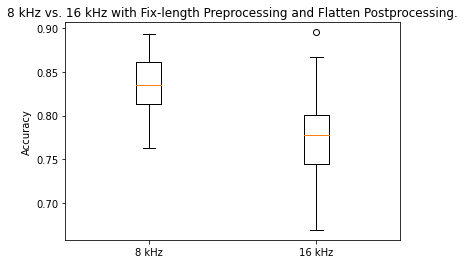

In [14]:
plt.boxplot(
    np.array([accuracies_8000, accuracies_16000]).T,
    labels=['8 kHz', '16 kHz']
)
plt.title('8 kHz vs. 16 kHz with Fix-length Preprocessing and Flatten Postprocessing.')
plt.ylabel('Accuracy')
plt.show()

## Second Feature Engineering Parameters: Preprocessing and Postprocessing
In this section, we are going to explore how different preprocessing and postprocessing methods interfere the accuracy for GMM training model

In [4]:
bangla_fix_length_flatten = np.load('../data_output/8000_fix-length_flatten/bangla/speaker_01/data.npy')
bangla_fix_length_flatten_label = np.zeros((bangla_8000.shape[0]), dtype=np.int8) + 0
malayalam_fix_length_flatten = np.load('../data_output/8000_fix-length_flatten/malayalam/speaker_01/data.npy')
malayalam_fix_length_flatten_label = np.zeros((malayalam_8000.shape[0]), dtype=np.int8) + 1
odiya_fix_length_flatten = np.load('../data_output/8000_fix-length_flatten/odiya/speaker_01/data.npy')
odiya_fix_length_flatten_label = np.zeros((odiya_8000.shape[0]), dtype=np.int8) + 2
telugu_fix_length_flatten = np.load('../data_output/8000_fix-length_flatten/telugu/speaker_01/data.npy')
telugu_fix_length_flatten_label = np.zeros((telugu_8000.shape[0]), dtype=np.int8) + 3

bangla_fix_length_take_average = np.load('../data_output/8000_fix-length_take-average/bangla/speaker_01/data.npy')
bangla_fix_length_take_average_label = np.zeros((bangla_8000.shape[0]), dtype=np.int8) + 0
malayalam_fix_length_take_average = np.load('../data_output/8000_fix-length_take-average/malayalam/speaker_01/data.npy')
malayalam_fix_length_take_average_label = np.zeros((malayalam_8000.shape[0]), dtype=np.int8) + 1
odiya_fix_length_take_average = np.load('../data_output/8000_fix-length_take-average/odiya/speaker_01/data.npy')
odiya_fix_length_take_average_label = np.zeros((odiya_8000.shape[0]), dtype=np.int8) + 2
telugu_fix_length_take_average = np.load('../data_output/8000_fix-length_take-average/telugu/speaker_01/data.npy')
telugu_fix_length_take_average_label = np.zeros((telugu_8000.shape[0]), dtype=np.int8) + 3

bangla_trim_silence_take_average = np.load('../data_output/8000_trim-silence_take-average/bangla/speaker_01/data.npy')
bangla_trim_silence_take_average_label = np.zeros((bangla_8000.shape[0]), dtype=np.int8) + 0
malayalam_trim_silence_take_average = np.load('../data_output/8000_trim-silence_take-average/malayalam/speaker_01/data.npy')
malayalam_trim_silence_take_average_label = np.zeros((malayalam_8000.shape[0]), dtype=np.int8) + 1
odiya_trim_silence_take_average = np.load('../data_output/8000_trim-silence_take-average/odiya/speaker_01/data.npy')
odiya_trim_silence_take_average_label = np.zeros((odiya_8000.shape[0]), dtype=np.int8) + 2
telugu_trim_silence_take_average = np.load('../data_output/8000_trim-silence_take-average/telugu/speaker_01/data.npy')
telugu_trim_silence_take_average_label = np.zeros((telugu_8000.shape[0]), dtype=np.int8) + 3

bangla_trim_silence_fix_length_flatten = np.load('../data_output/8000_trim-silence-fix-length_flatten/bangla/speaker_01/data.npy')
bangla_trim_silence_fix_length_flatten_label = np.zeros((bangla_8000.shape[0]), dtype=np.int8) + 0
malayalam_trim_silence_fix_length_flatten = np.load('../data_output/8000_trim-silence-fix-length_flatten/malayalam/speaker_01/data.npy')
malayalam_trim_silence_fix_length_flatten_label = np.zeros((malayalam_8000.shape[0]), dtype=np.int8) + 1
odiya_trim_silence_fix_length_flatten = np.load('../data_output/8000_trim-silence-fix-length_flatten/odiya/speaker_01/data.npy')
odiya_trim_silence_fix_length_flatten_label = np.zeros((odiya_8000.shape[0]), dtype=np.int8) + 2
telugu_trim_silence_fix_length_flatten = np.load('../data_output/8000_trim-silence-fix-length_flatten/telugu/speaker_01/data.npy')
telugu_trim_silence_fix_length_flatten_label = np.zeros((telugu_8000.shape[0]), dtype=np.int8) + 3

bangla_trim_silence_fix_length_take_average = np.load('../data_output/8000_trim-silence-fix-length_take-average/bangla/speaker_01/data.npy')
bangla_trim_silence_fix_length_take_average_label = np.zeros((bangla_8000.shape[0]), dtype=np.int8) + 0
malayalam_trim_silence_fix_length_take_average = np.load('../data_output/8000_trim-silence-fix-length_take-average/malayalam/speaker_01/data.npy')
malayalam_trim_silence_fix_length_take_average_label = np.zeros((malayalam_8000.shape[0]), dtype=np.int8) + 1
odiya_trim_silence_fix_length_take_average = np.load('../data_output/8000_trim-silence-fix-length_take-average/odiya/speaker_01/data.npy')
odiya_trim_silence_fix_length_take_average_label = np.zeros((odiya_8000.shape[0]), dtype=np.int8) + 2
telugu_trim_silence_fix_length_take_average = np.load('../data_output/8000_trim-silence-fix-length_take-average/telugu/speaker_01/data.npy')
telugu_trim_silence_fix_length_take_average_label = np.zeros((telugu_8000.shape[0]), dtype=np.int8) + 3

In [5]:
accuracies_fix_length_flatten = []
accuracies_fix_length_take_average = []
accuracies_trim_silence_take_average = []
accuracies_trim_silence_fix_length_flatten = []
accuracies_trim_silence_fix_length_take_average = []

for _ in tqdm(range(100)):
    bangla_fix_length_flatten_train, bangla_fix_length_flatten_test, bangla_fix_length_flatten_label_train, bangla_fix_length_flatten_label_test = train_test_split(bangla_fix_length_flatten, bangla_fix_length_flatten_label, test_size=0.2, shuffle=True)
    malayalam_fix_length_flatten_train, malayalam_fix_length_flatten_test, malayalam_fix_length_flatten_label_train, malayalam_fix_length_flatten_label_test = train_test_split(malayalam_fix_length_flatten, malayalam_fix_length_flatten_label, test_size=0.2, shuffle=True)
    odiya_fix_length_flatten_train, odiya_fix_length_flatten_test, odiya_fix_length_flatten_label_train, odiya_fix_length_flatten_label_test = train_test_split(odiya_fix_length_flatten, odiya_fix_length_flatten_label, test_size=0.2, shuffle=True)
    telugu_fix_length_flatten_train, telugu_fix_length_flatten_test, telugu_fix_length_flatten_label_train, telugu_fix_length_flatten_label_test = train_test_split(telugu_fix_length_flatten, telugu_fix_length_flatten_label, test_size=0.2, shuffle=True)
    testing_fix_length_flatten = np.vstack((bangla_fix_length_flatten_test, malayalam_fix_length_flatten_test, odiya_fix_length_flatten_test, telugu_fix_length_flatten_test))
    testing_label_fix_length_flatten = np.concatenate((bangla_fix_length_flatten_label_test, malayalam_fix_length_flatten_label_test, odiya_fix_length_flatten_label_test, telugu_fix_length_flatten_label_test))

    bangla_fix_length_take_average_train, bangla_fix_length_take_average_test, bangla_fix_length_take_average_label_train, bangla_fix_length_take_average_label_test = train_test_split(bangla_fix_length_take_average, bangla_fix_length_take_average_label, test_size=0.2, shuffle=True)
    malayalam_fix_length_take_average_train, malayalam_fix_length_take_average_test, malayalam_fix_length_take_average_label_train, malayalam_fix_length_take_average_label_test = train_test_split(malayalam_fix_length_take_average, malayalam_fix_length_take_average_label, test_size=0.2, shuffle=True)
    odiya_fix_length_take_average_train, odiya_fix_length_take_average_test, odiya_fix_length_take_average_label_train, odiya_fix_length_take_average_label_test = train_test_split(odiya_fix_length_take_average, odiya_fix_length_take_average_label, test_size=0.2, shuffle=True)
    telugu_fix_length_take_average_train, telugu_fix_length_take_average_test, telugu_fix_length_take_average_label_train, telugu_fix_length_take_average_label_test = train_test_split(telugu_fix_length_take_average, telugu_fix_length_take_average_label, test_size=0.2, shuffle=True)
    testing_fix_length_take_average = np.vstack((bangla_fix_length_take_average_test, malayalam_fix_length_take_average_test, odiya_fix_length_take_average_test, telugu_fix_length_take_average_test))
    testing_label_fix_length_take_average = np.concatenate((bangla_fix_length_take_average_label_test, malayalam_fix_length_take_average_label_test, odiya_fix_length_take_average_label_test, telugu_fix_length_take_average_label_test))

    bangla_trim_silence_take_average_train, bangla_trim_silence_take_average_test, bangla_trim_silence_take_average_label_train, bangla_trim_silence_take_average_label_test = train_test_split(bangla_trim_silence_take_average, bangla_trim_silence_take_average_label, test_size=0.2, shuffle=True)
    malayalam_trim_silence_take_average_train, malayalam_trim_silence_take_average_test, malayalam_trim_silence_take_average_label_train, malayalam_trim_silence_take_average_label_test = train_test_split(malayalam_trim_silence_take_average, malayalam_trim_silence_take_average_label, test_size=0.2, shuffle=True)
    odiya_trim_silence_take_average_train, odiya_trim_silence_take_average_test, odiya_trim_silence_take_average_label_train, odiya_trim_silence_take_average_label_test = train_test_split(odiya_trim_silence_take_average, odiya_trim_silence_take_average_label, test_size=0.2, shuffle=True)
    telugu_trim_silence_take_average_train, telugu_trim_silence_take_average_test, telugu_trim_silence_take_average_label_train, telugu_trim_silence_take_average_label_test = train_test_split(telugu_trim_silence_take_average, telugu_trim_silence_take_average_label, test_size=0.2, shuffle=True)
    testing_trim_silence_take_average = np.vstack((bangla_trim_silence_take_average_test, malayalam_trim_silence_take_average_test, odiya_trim_silence_take_average_test, telugu_trim_silence_take_average_test))
    testing_label_trim_silence_take_average = np.concatenate((bangla_trim_silence_take_average_label_test, malayalam_trim_silence_take_average_label_test, odiya_trim_silence_take_average_label_test, telugu_trim_silence_take_average_label_test))

    bangla_trim_silence_fix_length_flatten_train, bangla_trim_silence_fix_length_flatten_test, bangla_trim_silence_fix_length_flatten_label_train, bangla_trim_silence_fix_length_flatten_label_test = train_test_split(bangla_trim_silence_fix_length_flatten, bangla_trim_silence_fix_length_flatten_label, test_size=0.2, shuffle=True)
    malayalam_trim_silence_fix_length_flatten_train, malayalam_trim_silence_fix_length_flatten_test, malayalam_trim_silence_fix_length_flatten_label_train, malayalam_trim_silence_fix_length_flatten_label_test = train_test_split(malayalam_trim_silence_fix_length_flatten, malayalam_trim_silence_fix_length_flatten_label, test_size=0.2, shuffle=True)
    odiya_trim_silence_fix_length_flatten_train, odiya_trim_silence_fix_length_flatten_test, odiya_trim_silence_fix_length_flatten_label_train, odiya_trim_silence_fix_length_flatten_label_test = train_test_split(odiya_trim_silence_fix_length_flatten, odiya_trim_silence_fix_length_flatten_label, test_size=0.2, shuffle=True)
    telugu_trim_silence_fix_length_flatten_train, telugu_trim_silence_fix_length_flatten_test, telugu_trim_silence_fix_length_flatten_label_train, telugu_trim_silence_fix_length_flatten_label_test = train_test_split(telugu_trim_silence_fix_length_flatten, telugu_trim_silence_fix_length_flatten_label, test_size=0.2, shuffle=True)
    testing_trim_silence_fix_length_flatten = np.vstack((bangla_trim_silence_fix_length_flatten_test, malayalam_trim_silence_fix_length_flatten_test, odiya_trim_silence_fix_length_flatten_test, telugu_trim_silence_fix_length_flatten_test))
    testing_label_trim_silence_fix_length_flatten = np.concatenate((bangla_trim_silence_fix_length_flatten_label_test, malayalam_trim_silence_fix_length_flatten_label_test, odiya_trim_silence_fix_length_flatten_label_test, telugu_trim_silence_fix_length_flatten_label_test))

    bangla_trim_silence_fix_length_take_average_train, bangla_trim_silence_fix_length_take_average_test, bangla_trim_silence_fix_length_take_average_label_train, bangla_trim_silence_fix_length_take_average_label_test = train_test_split(bangla_trim_silence_fix_length_take_average, bangla_trim_silence_fix_length_take_average_label, test_size=0.2, shuffle=True)
    malayalam_trim_silence_fix_length_take_average_train, malayalam_trim_silence_fix_length_take_average_test, malayalam_trim_silence_fix_length_take_average_label_train, malayalam_trim_silence_fix_length_take_average_label_test = train_test_split(malayalam_trim_silence_fix_length_take_average, malayalam_trim_silence_fix_length_take_average_label, test_size=0.2, shuffle=True)
    odiya_trim_silence_fix_length_take_average_train, odiya_trim_silence_fix_length_take_average_test, odiya_trim_silence_fix_length_take_average_label_train, odiya_trim_silence_fix_length_take_average_label_test = train_test_split(odiya_trim_silence_fix_length_take_average, odiya_trim_silence_fix_length_take_average_label, test_size=0.2, shuffle=True)
    telugu_trim_silence_fix_length_take_average_train, telugu_trim_silence_fix_length_take_average_test, telugu_trim_silence_fix_length_take_average_label_train, telugu_trim_silence_fix_length_take_average_label_test = train_test_split(telugu_trim_silence_fix_length_take_average, telugu_trim_silence_fix_length_take_average_label, test_size=0.2, shuffle=True)
    testing_trim_silence_fix_length_take_average = np.vstack((bangla_trim_silence_fix_length_take_average_test, malayalam_trim_silence_fix_length_take_average_test, odiya_trim_silence_fix_length_take_average_test, telugu_trim_silence_fix_length_take_average_test))
    testing_label_trim_silence_fix_length_take_average = np.concatenate((bangla_trim_silence_fix_length_take_average_label_test, malayalam_trim_silence_fix_length_take_average_label_test, odiya_trim_silence_fix_length_take_average_label_test, telugu_trim_silence_fix_length_take_average_label_test))

    bangla_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_fix_length_flatten_train)
    malayalam_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_fix_length_flatten_train)
    odiya_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_fix_length_flatten_train)
    telugu_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_fix_length_flatten_train)

    bangla_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_fix_length_take_average_train)
    malayalam_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_fix_length_take_average_train)
    odiya_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_fix_length_take_average_train)
    telugu_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_fix_length_take_average_train)

    bangla_trim_silence_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_trim_silence_take_average_train)
    malayalam_trim_silence_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_trim_silence_take_average_train)
    odiya_trim_silence_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_trim_silence_take_average_train)
    telugu_trim_silence_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_trim_silence_take_average_train)

    bangla_trim_silence_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_trim_silence_fix_length_flatten_train)
    malayalam_trim_silence_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_trim_silence_fix_length_flatten_train)
    odiya_trim_silence_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_trim_silence_fix_length_flatten_train)
    telugu_trim_silence_fix_length_flatten_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_trim_silence_fix_length_flatten_train)

    bangla_trim_silence_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_trim_silence_fix_length_take_average_train)
    malayalam_trim_silence_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_trim_silence_fix_length_take_average_train)
    odiya_trim_silence_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_trim_silence_fix_length_take_average_train)
    telugu_trim_silence_fix_length_take_average_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_trim_silence_fix_length_take_average_train)

    accuracy_fix_length_flatten = gmm_predict([bangla_fix_length_flatten_gmm, malayalam_fix_length_flatten_gmm, odiya_fix_length_flatten_gmm, telugu_fix_length_flatten_gmm], testing_fix_length_flatten, testing_label_fix_length_flatten)
    accuracies_fix_length_flatten.append(accuracy_fix_length_flatten)

    accuracy_fix_length_take_average = gmm_predict([bangla_fix_length_take_average_gmm, malayalam_fix_length_take_average_gmm, odiya_fix_length_take_average_gmm, telugu_fix_length_take_average_gmm], testing_fix_length_take_average, testing_label_fix_length_take_average)
    accuracies_fix_length_take_average.append(accuracy_fix_length_take_average)

    accuracy_trim_silence_take_average = gmm_predict([bangla_trim_silence_take_average_gmm, malayalam_trim_silence_take_average_gmm, odiya_trim_silence_take_average_gmm, telugu_trim_silence_take_average_gmm], testing_trim_silence_take_average, testing_label_trim_silence_take_average)
    accuracies_trim_silence_take_average.append(accuracy_trim_silence_take_average)

    accuracy_trim_silence_fix_length_flatten = gmm_predict([bangla_trim_silence_fix_length_flatten_gmm, malayalam_trim_silence_fix_length_flatten_gmm, odiya_trim_silence_fix_length_flatten_gmm, telugu_trim_silence_fix_length_flatten_gmm], testing_trim_silence_fix_length_flatten, testing_label_trim_silence_fix_length_flatten)
    accuracies_trim_silence_fix_length_flatten.append(accuracy_trim_silence_fix_length_flatten)

    accuracy_trim_silence_fix_length_take_average = gmm_predict([bangla_trim_silence_fix_length_take_average_gmm, malayalam_trim_silence_fix_length_take_average_gmm, odiya_trim_silence_fix_length_take_average_gmm, telugu_trim_silence_fix_length_take_average_gmm], testing_trim_silence_fix_length_take_average, testing_label_trim_silence_fix_length_take_average)
    accuracies_trim_silence_fix_length_take_average.append(accuracy_trim_silence_fix_length_take_average)

100%|██████████| 100/100 [30:22<00:00, 18.22s/it]


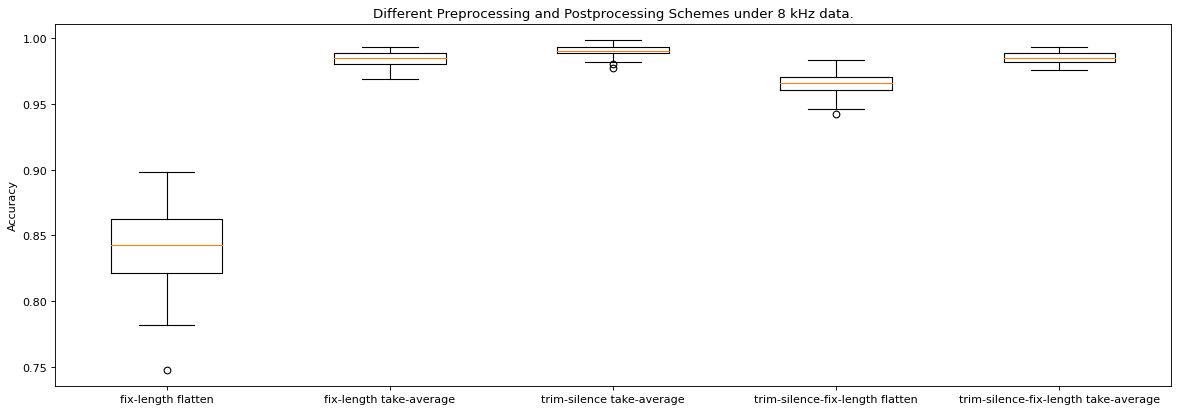

In [14]:
fig = plt.figure(figsize=(18, 6), dpi=80)
plt.boxplot(
    np.array([accuracies_fix_length_flatten, accuracies_fix_length_take_average, accuracies_trim_silence_take_average, accuracies_trim_silence_fix_length_flatten, accuracies_trim_silence_fix_length_take_average]).T,
    labels=['fix-length flatten', 'fix-length take-average', 'trim-silence take-average', 'trim-silence-fix-length flatten', 'trim-silence-fix-length take-average']
)
plt.title('Different Preprocessing and Postprocessing Schemes under 8 kHz data.')
plt.ylabel('Accuracy')
plt.show()

## Third Feature Engineering Parameters: Number of MFCC features
In this section, we are going to explore how different number of MFCC features would interfere the accuracy for GMM training model

In [3]:
accuracies_fix_length_flatten_mfcc = []

for mfcc in range(3, 24, 2):
    bangla_data = np.load(f'../data_output/{mfcc}_trim-silence_take-average/bangla/speaker_01/data.npy')
    bangla_data_label = np.zeros((bangla_data.shape[0]), dtype=np.int8) + 0
    malayalam_data = np.load(f'../data_output/{mfcc}_trim-silence_take-average/malayalam/speaker_01/data.npy')
    malayalam_data_label = np.zeros((malayalam_data.shape[0]), dtype=np.int8) + 1
    odiya_data = np.load(f'../data_output/{mfcc}_trim-silence_take-average/odiya/speaker_01/data.npy')
    odiya_data_label = np.zeros((odiya_data.shape[0]), dtype=np.int8) + 2
    telugu_data = np.load(f'../data_output/{mfcc}_trim-silence_take-average/telugu/speaker_01/data.npy')
    telugu_data_label = np.zeros((telugu_data.shape[0]), dtype=np.int8) + 3

    accuracies = []

    for i in tqdm(range(100), desc=f'MFCC features {mfcc}'):
        bangla_data_train, bangla_data_test, bangla_data_label_train, bangla_data_label_test = train_test_split(bangla_data, bangla_data_label, test_size=0.2, shuffle=True)
        malayalam_data_train, malayalam_data_test, malayalam_data_label_train, malayalam_data_label_test = train_test_split(malayalam_data, malayalam_data_label, test_size=0.2, shuffle=True)
        odiya_data_train, odiya_data_test, odiya_data_label_train, odiya_data_label_test = train_test_split(odiya_data, odiya_data_label, test_size=0.2, shuffle=True)
        telugu_data_train, telugu_data_test, telugu_data_label_train, telugu_data_label_test = train_test_split(telugu_data, telugu_data_label, test_size=0.2, shuffle=True)

        testing_data = np.vstack((bangla_data_test, malayalam_data_test, odiya_data_test, telugu_data_test))
        testing_label_data = np.concatenate((bangla_data_label_test, malayalam_data_label_test, odiya_data_label_test, telugu_data_label_test))

        bangla_data_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(bangla_data_train)
        malayalam_data_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(malayalam_data_train)
        odiya_data_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(odiya_data_train)
        telugu_data_gmm = GaussianMixture(n_components=16, max_iter=200, covariance_type='diag', n_init=3).fit(telugu_data_train)

        accuracies.append(gmm_predict([bangla_data_gmm, malayalam_data_gmm, odiya_data_gmm, telugu_data_gmm], testing_data, testing_label_data))

    accuracies_fix_length_flatten_mfcc.append(accuracies)

MFCC features 23: 100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


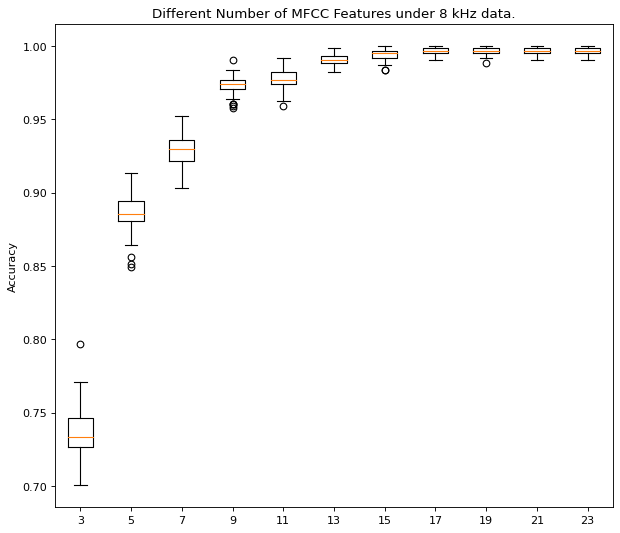

In [7]:
fig = plt.figure(figsize=(9, 8), dpi=80)
plt.boxplot(
    np.array(accuracies_fix_length_flatten_mfcc).T,
    labels=[str(i) for i in range(3, 24, 2)]
)
plt.title('Different Number of MFCC Features under 8 kHz data.')
plt.ylabel('Accuracy')
plt.savefig('output/mfcc.png')
plt.show()